In [1]:
%matplotlib widget
import pylab as plt

In [2]:
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
filename = get_pkg_data_filename('photometry/M6707HH.fits')  
hdulist = fits.open(filename)
hdu = hdulist[0]

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
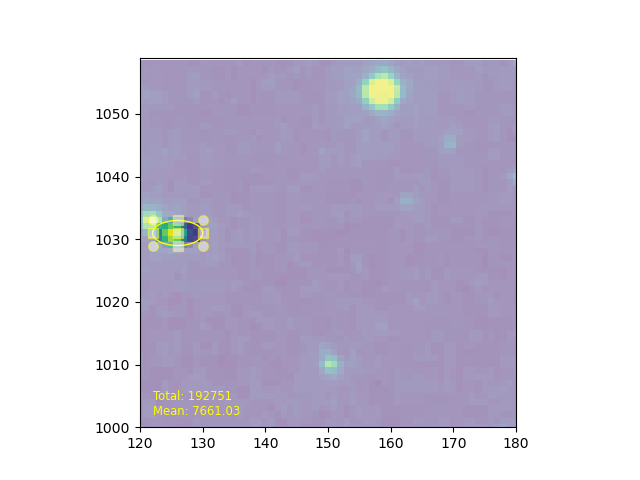

In [3]:
from astropy import units as u
from regions import PixCoord, EllipsePixelRegion

hdulist = fits.open(filename)
hdu = hdulist[0]

plt.clf()
ax = plt.subplot(1, 1, 1)
im = ax.imshow(hdu.data, cmap=plt.cm.viridis, interpolation='nearest', origin='lower')
text = ax.text(122, 1002, '', size='small', color='yellow')
ax.set_xlim(120, 180)
ax.set_ylim(1000, 1059)

def update_sel(region):
    mask = region.to_mask(mode='subpixels', subpixels=10)
    im.set_alpha((mask.to_image(hdu.data.shape) + 1) / 2)
    total = mask.multiply(hdu.data).sum()
    mean = np.average(hdu.data, weights=mask.to_image(hdu.data.shape))
    text.set_text(f'Total: {total:g}\nMean: {mean:g}')

ellipse = EllipsePixelRegion(center=PixCoord(x=126, y=1031), width=8, height=4,
                             angle=-0*u.deg, visual={'color': 'yellow'})
selector = ellipse.as_mpl_selector(ax, callback=update_sel, use_data_coordinates=True)

hdulist.close()